In [1]:
import os
import numpy as np
from medpy.io import load, save
import matplotlib.pyplot as plt

## Carrega imagens e máscaras

In [2]:
def load_images(folder_path):
    patient_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    patient_folders.sort()

    images = []
    for patient_folder in patient_folders:
        patient_image_folder = os.path.join(folder_path, patient_folder)
        dicom_files = [f for f in os.listdir(patient_image_folder) if f.endswith('.dcm')]

        patient_images = []
        for dicom_file in dicom_files:
            dicom_path = os.path.join(patient_image_folder, dicom_file)
            image, _ = load(dicom_path)
            patient_images.append(image)

        patient_images = np.array(patient_images)
        patient_images = np.squeeze(patient_images, axis=-1)
        patient_images = np.transpose(patient_images, (1, 2, 0))
        images.append(patient_images)

    np.save(os.path.join(folder_path, "images.npy"), np.array(images))

    return np.array(images)

def load_masks(folder_path):
    nrrd_files = [f for f in os.listdir(folder_path) if f.endswith('.nrrd')]
    nrrd_files.sort()

    masks = []
    for nrrd_file in nrrd_files:
        mask_path = os.path.join(folder_path, nrrd_file)
        mask, _ = load(mask_path)
        masks.append(np.array(mask))

    np.save(os.path.join(folder_path, "masks.npy"), np.array(masks))

    return np.array(masks)


### Diretório dos dados

`/datahome/mario/datasets/Images/NCI-ISBI-2013-Prostate-Challenge/`

`Training_images`
`Training_masks`
`Test_images`
`Test_masks`
`LeaderBoard_images`
`LeaderBoard_masks`

In [3]:
train_images_folder = "/datahome/mario/datasets/Images/NCI-ISBI-2013-Prostate-Challenge/Training_imgs/"
train_masks_folder = "/datahome/mario/datasets/Images/NCI-ISBI-2013-Prostate-Challenge/Training_masks/"
train_images = load_images(train_images_folder)
train_masks = load_masks(train_masks_folder)

/tmp/ipykernel_33118/2122318161.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(os.path.join(folder_path, "images.npy"), np.array(images))
/tmp/ipykernel_33118/2122318161.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)
/tmp/ipykernel_33118/2122318161.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the

## Visualizando algumas imagens

32


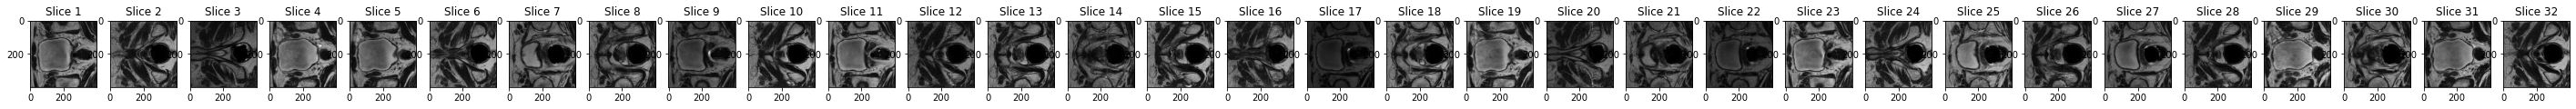

In [4]:
num_slices = train_images[30].shape[2]
fig, axes = plt.subplots(1, num_slices, figsize=(50, 50))
print(num_slices)

for i in range(num_slices):
    axes[i].imshow(train_images[30][:, :, i], cmap='gray')
    axes[i].set_title(f'Slice {i + 1}')

plt.show()

32


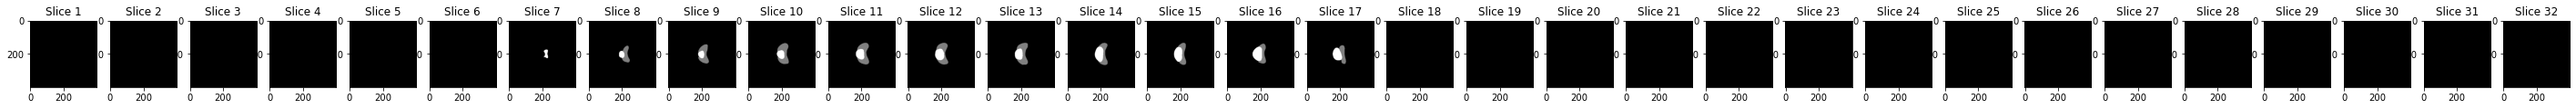

In [5]:
# Showing Segmentation
num_slices = train_masks[30].shape[2]
fig, axes = plt.subplots(1, num_slices, figsize=(50, 50))
print(num_slices)

for i in range(num_slices):
    axes[i].imshow(train_masks[30][:, :, i], cmap='gray')
    axes[i].set_title(f'Slice {i + 1}')

plt.show()

In [6]:
# Showing Images and Masks

def display_image_with_mask(image, mask, alpha=0.7):
    num_slices = image.shape[2]
    fig, axes = plt.subplots(1, num_slices, figsize=(50, 50))

    for i in range(num_slices):

        axes[i].imshow(image[:, :, i], cmap='gray')
        axes[i].set_title(f'Slice {i + 1}')

        axes[i].imshow(mask[:, :, i], cmap='Reds', alpha=alpha)

    plt.show()

display_image_with_mask(test_images[0], test_masks[0])

NameError: name 'test_images' is not defined

Check whether the train images and masks are correctly loaded and correspond to eachother by randomly displaying 5 pairs of them

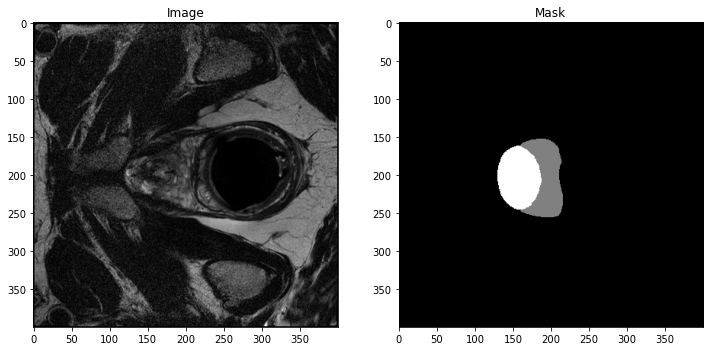

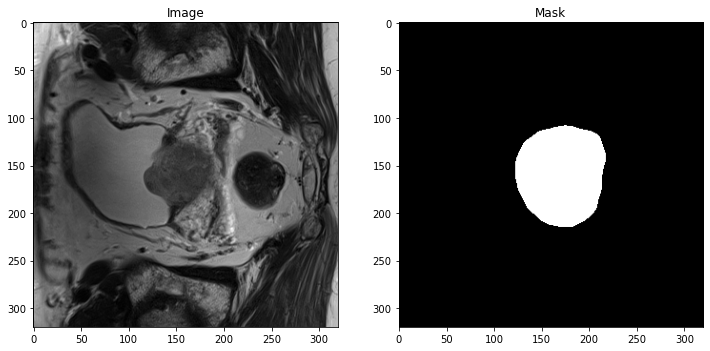

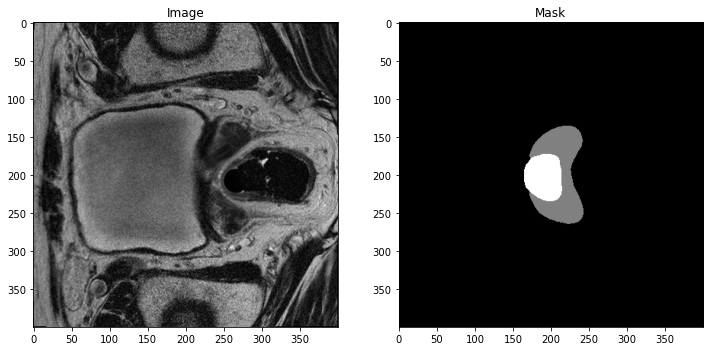

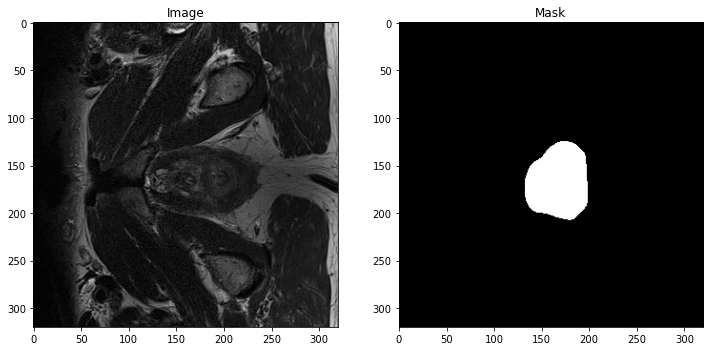

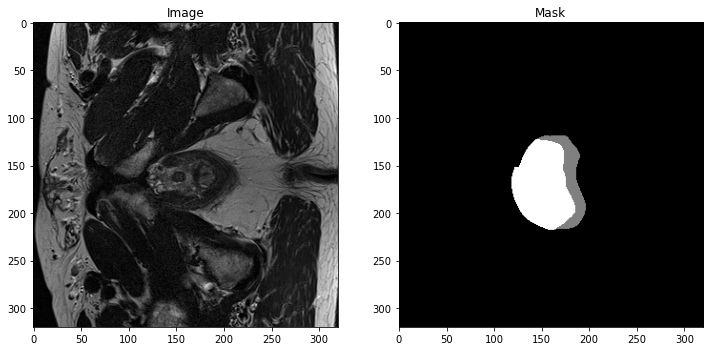

In [7]:
import matplotlib.pyplot as plt

num_samples_to_visualize = 5

for i in range(num_samples_to_visualize):
    index = np.random.randint(len(train_images))

    image = train_images[index]
    mask = train_masks[index]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image[:, :, 10], cmap='gray')
    axes[0].set_title('Image')

    axes[1].imshow(mask[:, :, 10], cmap='gray')
    axes[1].set_title('Mask')

    plt.show()

In [11]:
train_masks

array([array([[[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]],

              [[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]],

              [[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]],

              ...,

              [[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
              